# TensorFlow-GPU model for MNIST dataset

In [ ]:
# Version 3
# 
# From begining install Tensorflow-GPU by 
# https://www.thehardwareguy.co.uk/install-tensorflow-gpu
# and look to this comment below article: 
# "In tensorflow = 2.1.0, it is not needed to install keras separately 
# (pip install keras not needed) and it will be installed (keras =2.2.4-tf) 
# as a dependency of tensorflow-gpu with "conda install" itself.

# it's work for me in Win10
# GOOD LUCK :)

In [1]:
# Imports
import os

import tensorflow as tf
# uncomment next 2 lines to start on GPU
# physical_devices = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class Data:
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.x_train, self.y_train),(self.x_test, self.y_test) = mnist.load_data(path="mnist.npz")
        # normalization
        self.x_train = self.x_train / 255.0
        self.x_test = self.x_test / 255.0

In [5]:
class Model:
    def __init__(self, hidden_layer, learning_rate):
        self.name = "mnist"
        self.save_folder = os.path.join(os.getcwd(), 
                                        "training_mnist_gpu")
        if not os.path.exists(self.save_folder):
            os.mkdir(self.save_folder)
        self.checkpoint_path = os.path.join(self.save_folder, 
                                            "cp.ckpt")
        
        self.model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(hidden_layer, 
                                  activation='relu'),
            tf.keras.layers.Dropout(learning_rate),
            tf.keras.layers.Dense(10, 
                                  activation='softmax')
        ])
        
        self.model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

    def train(self, data, epochs):
        checkpoint_dir = os.path.dirname(self.checkpoint_path)
        cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=self.checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq=10*len(data.x_train),
                                                         verbose=1)
        self.model.fit(data.x_train, 
                       data.y_train, 
                       epochs=epochs,
                       validation_data=(data.x_train, data.y_train),
                       callbacks=[cp_callback])

        return self.model.evaluate(x=data.x_test, 
                                   y=data.y_test, 
                                   verbose=1)

In [154]:
hidden_layer=128

# Best values (acc=0.9804)
# ep_list = [2]
# lr_list = [0.15]

# Short exploratory
ep_list = [3, 5, 7, 10, 12, 15]
lr_list = [0.15, 0.1, 0.05, 0.01]

# Exploratory values - uncomment to train on various parameters
# lr_list = [0.2, 0.15, 0.1, 0.05, 0.02, 0.01]
# ep_list = range(9, 21, 3)

data = Data()
results = list()
best_acc = 0
cycle = 1
all_cycles = len(lr_list) * len(ep_list)
for lr in lr_list:
    for ep in ep_list:
        print(f"\n--- cycle {cycle} of {all_cycles} ---")
        print(f"learning_rate={lr}, num_ep={ep}")
        
        M = Model(hidden_layer, lr)
        loss, acc = M.train(data, ep)
        
        # save best
        if acc > best_acc:
            params = f"hl{hidden_layer}_lr{int(lr*10000)}_ep{ep}"
            model_filename = f"{M.name}_{int(acc*10000)}({params}).h5"
            M.model.save(os.path.join(M.save_folder, model_filename))
            print(f"model saved to {model_filename}")
            best_acc = acc
        
        results.append({'n': cycle, 'lr': lr, 'ep': ep, 'loss': loss, 'acc': acc})
        cycle += 1



--- cycle 1 of 24 ---
learning_rate=0.15, num_ep=3
Train on 60000 samples, validate on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2855 - accuracy: 0.9167 - val_loss: 0.1319 - val_accuracy: 0.9618
Epoch 2/3
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1360 - accuracy: 0.9594 - val_loss: 0.0806 - val_accuracy: 0.9759
Epoch 3/3
10000/10000 [==============================] - 0s 44us/sample - loss: 0.0843 - accuracy: 0.9737
model saved to mnist_9736(hl128_lr1500_ep3).h5

--- cycle 2 of 24 ---
learning_rate=0.15, num_ep=5
Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2844 - accuracy: 0.9171 - val_loss: 0.1357 - val_accuracy: 0.9595
Epoch 2/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1336 - accuracy: 0.9605 - val_loss: 0.0846 - val_accuracy: 0.9751
Epoch 3/5
60000/60000 [==========================

60000/60000 [==============================] - 6s 95us/sample - loss: 0.0448 - accuracy: 0.9852 - val_loss: 0.0210 - val_accuracy: 0.9940
Epoch 9/15
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0385 - accuracy: 0.9875 - val_loss: 0.0191 - val_accuracy: 0.9941
Epoch 10/15
59744/60000 [============================>.] - ETA: 0s - loss: 0.0362 - accuracy: 0.9878
Epoch 00010: saving model to C:\Users\dimish\Desktop\nn\training_mnist_gpu\cp.ckpt
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0363 - accuracy: 0.9877 - val_loss: 0.0159 - val_accuracy: 0.9955
Epoch 11/15
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0340 - accuracy: 0.9887 - val_loss: 0.0143 - val_accuracy: 0.9960
Epoch 12/15
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0307 - accuracy: 0.9899 - val_loss: 0.0121 - val_accuracy: 0.9969
Epoch 13/15
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0297 - 

10000/10000 [==============================] - 0s 42us/sample - loss: 0.0802 - accuracy: 0.9792

--- cycle 12 of 24 ---
learning_rate=0.1, num_ep=15
Train on 60000 samples, validate on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2745 - accuracy: 0.9215 - val_loss: 0.1304 - val_accuracy: 0.9625
Epoch 2/15
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1270 - accuracy: 0.9622 - val_loss: 0.0789 - val_accuracy: 0.9766
Epoch 3/15
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0915 - accuracy: 0.9716 - val_loss: 0.0603 - val_accuracy: 0.9821
Epoch 4/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0729 - accuracy: 0.9777 - val_loss: 0.0454 - val_accuracy: 0.9865
Epoch 5/15
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0589 - accuracy: 0.9816 - val_loss: 0.0355 - val_accuracy: 0.9894
Epoch 6/15
60000/60000 [==============================]

60000/60000 [==============================] - 6s 99us/sample - loss: 0.0528 - accuracy: 0.9835 - val_loss: 0.0352 - val_accuracy: 0.9897
Epoch 6/12
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0426 - accuracy: 0.9863 - val_loss: 0.0282 - val_accuracy: 0.9917
Epoch 7/12
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0225 - val_accuracy: 0.9936
Epoch 8/12
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.0193 - val_accuracy: 0.9944
Epoch 9/12
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.0172 - val_accuracy: 0.9951
Epoch 10/12
59072/60000 [============================>.] - ETA: 0s - loss: 0.0224 - accuracy: 0.9925
Epoch 00010: saving model to C:\Users\dimish\Desktop\nn\training_mnist_gpu\cp.ckpt
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0223 - a

60000/60000 [==============================] - 6s 93us/sample - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0128 - val_accuracy: 0.9966
Epoch 10/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0189 - accuracy: 0.9940
Epoch 00010: saving model to C:\Users\dimish\Desktop\nn\training_mnist_gpu\cp.ckpt
10000/10000 [==============================] - 0s 43us/sample - loss: 0.0722 - accuracy: 0.9795

--- cycle 23 of 24 ---
learning_rate=0.01, num_ep=12
Train on 60000 samples, validate on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2546 - accuracy: 0.9260 - val_loss: 0.1246 - val_accuracy: 0.9640
Epoch 2/12
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1116 - accuracy: 0.9666 - val_loss: 0.0769 - val_accuracy: 0.9775
Epoch 3/12
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0777 - accuracy: 0.9760 - val_loss: 0.0652 - val_accuracy: 0.9810
Epoch 4/12
60000/60000 [=====

In [155]:
# Show me best 5 in table
results_df = pd.DataFrame(columns=['n', 'lr', 'ep', 'loss', 'acc'])
results_df = results_df.append(results, ignore_index=True).sort_values('acc', ascending=False)
print(results_df.head())

     n    lr  ep      loss     acc
11  12  0.10  15  0.078515  0.9809
4    5  0.15  12  0.070770  0.9805
8    9  0.10   7  0.068249  0.9802
5    6  0.15  15  0.078584  0.9801
20  21  0.01   7  0.071105  0.9797


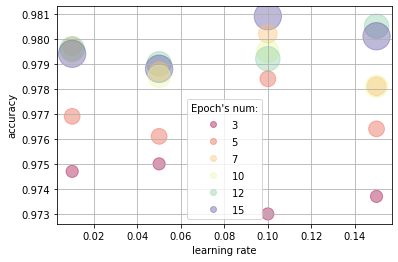

In [165]:
# Show me graph
g = results_df[['ep', 'lr', 'acc']]

fig, ax = plt.subplots()
fig.figsize=(15, 10)

scatter = ax.scatter(x='lr', y='acc', 
                     data=g, 
                     s=list(map(lambda a: a * 50, g['ep'])),
                     c='ep',
                     alpha=0.4,
                     cmap="Spectral")

plt.ylabel('accuracy')
plt.xlabel('learning rate')

ax.legend(*scatter.legend_elements(), 
          loc="best", 
          title="Epoch's num:")
ax.grid(True)
plt.show()